In [23]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [24]:
# import NIJ_s_Recidivism_Challenge_Full_Dataset from the internet
url = "https://data.ojp.usdoj.gov/resource/8tjc-3ibv.csv"
df = pd.read_csv("NIJ_s_Recidivism_Challenge_Full_Dataset.csv")
df

,ID,Gender,Race,Age_at_Release,Residence_PUMA,Gang_Affiliated,Supervision_Risk_Score_First,Supervision_Level_First,Education_Level,Dependents,...,DrugTests_Meth_Positive,DrugTests_Other_Positive,Percent_Days_Employed,Jobs_Per_Year,Employment_Exempt,Recidivism_Within_3years,Recidivism_Arrest_Year1,Recidivism_Arrest_Year2,Recidivism_Arrest_Year3,Training_Sample
0,1,M,BLACK,43-47,16,False,3.0,Standard,At least some college,3 or more,...,0.000000,0.0,0.488562,0.447610,False,False,False,False,False,1
1,2,M,BLACK,33-37,16,False,6.0,Specialized,Less than HS diploma,1,...,0.000000,0.0,0.425234,2.000000,False,True,False,False,True,1
2,3,M,BLACK,48 or older,24,False,7.0,High,At least some college,3 or more,...,0.166667,0.0,0.000000,0.000000,False,True,False,True,False,1
3,4,M,WHITE,38-42,16,False,7.0,High,Less than HS diploma,1,...,0.000000,0.0,1.000000,0.718996,False,False,False,False,False,1
4,5,M,WHITE,33-37,16,False,4.0,Specialized,Less than HS diploma,3 or more,...,0.058824,0.0,0.203562,0.929389,False,True,True,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25830,26756,M,BLACK,23-27,9,False,5.0,Standard,At least some college,1,...,0.000000,0.0,0.189507,0.572044,False,True,True,False,False,1
25831,26758,M,WHITE,38-42,25,False,5.0,Standard,At least some college,3 or more,...,0.000000,0.0,0.757098,0.576104,False,True,False,True,False,1
25832,26759,M,BLACK,33-37,15,False,5.0,Standard,At least some college,3 or more,...,NaN,NaN,0.711138,0.894125,False,True,False,True,False,1
25833,26760,F,WHITE,33-37,15,NaN,5.0,Standard,At least some college,3 or more,...,0.000000,0.0,0.000000,0.000000,True,False,False,False,False,1


#Data Preprocessing

In [25]:
# Handling missing values
df.dropna(inplace=True)

# Map string values to numerical representations

# Choose relevant columns or create new features if needed
selected_features = ['Recidivism_Arrest_Year1', 'Recidivism_Arrest_Year2', 'Recidivism_Arrest_Year3']  # Replace with actual column names

X = df[selected_features]
y = df['Recidivism_Within_3years']  # column name for prediction


# Normalize/Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Scale numerical features

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [26]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
MSE = mean_squared_error(y_test, y_pred)
R2 = r2_score(y_test, y_pred)

print("MSE:", MSE)
print("R2:", R2)

MSE: 8.519856671270506e-30
R2: 1.0



# Simple Model For Linear Regression
---



In [27]:
#simple regression model with 'Recidivism_Arrest_Year2' as a predictor variable

x1 = df["Recidivism_Arrest_Year2"]
y=df["Recidivism_Within_3years"]

x1 = x1.to_numpy().reshape(-1,1)
y = y.to_numpy().reshape(-1,1)

#train model
model = LinearRegression()
model.fit(x1,y)
y_pred = model.predict(x1)

MSE= mean_squared_error(y, y_pred)
R2= r2_score(y, y_pred)

print("MSE:", MSE)
print("R2:", R2)


MSE: 0.2014377934381116
R2: 0.16444958707782953


#Multivariate Linear Regression

In [28]:

# Assuming 'Recidivism_Arrest_Year1' and 'Recidivism_Arrest_Year2' are predictor variables
x2 = df[['Recidivism_Arrest_Year1', 'Recidivism_Arrest_Year2']]
y = df['Recidivism_Within_3years']  # Assuming this is the target variable

# Instantiate the Linear Regression model
model = LinearRegression()

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x2, y, test_size=0.3, random_state=42)

# Train the model
model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = model.predict(x_test)

# Evaluate predictions
MSE = mean_squared_error(y_test, y_pred)
R2 = r2_score(y_test, y_pred)

print("MSE:", MSE)
print("R2:", R2)

MSE: 0.0915652359513231
R2: 0.6207402332477339


In [29]:

# Assuming 'Recidivism_Arrest_Year1', 'Recidivism_Arrest_Year2', and 'Recidivism_Arrest_Year3' are predictor variables
x3 = df[['Recidivism_Arrest_Year1', 'Recidivism_Arrest_Year2', 'Recidivism_Arrest_Year3']]
y = df['Recidivism_Within_3years']  # Replace 'target_column' with your actual target column name

# Initialize a Linear Regression model
model = LinearRegression()

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x3, y, test_size=0.3, random_state=42)

# Train the model
model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = model.predict(x_test)

# Evaluate predictions
MSE = mean_squared_error(y_test, y_pred)
R2 = r2_score(y_test, y_pred)

print("MSE:", MSE)
print("R2:", R2)

MSE: 1.1510304772899171e-29
R2: 1.0


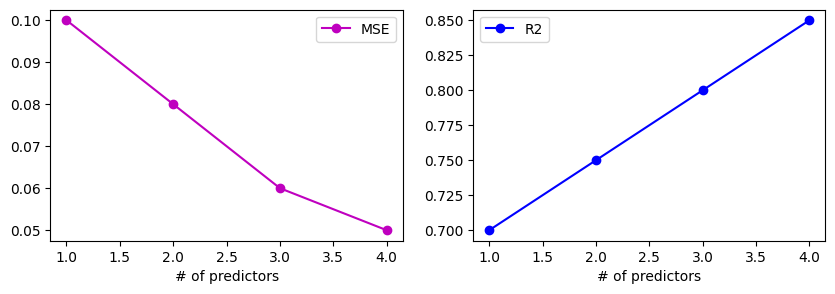

In [22]:
# Assuming you have collected MSE and R2 scores for different numbers of predictors
# Example data for demonstration purposes
predictors = [1, 2, 3, 4]  # Example number of predictors
MSE_scores = [0.1, 0.08, 0.06, 0.05]  # Example MSE scores
R2_scores = [0.7, 0.75, 0.8, 0.85]  # Example R2 scores

# Plotting MSE and R2 scores against number of predictors
fig, (ax, bx) = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))

ax.plot(predictors, MSE_scores, '-o', color='m', label='MSE')
bx.plot(predictors, R2_scores, '-o', color='b', label='R2')

ax.set_xlabel("# of predictors")
bx.set_xlabel("# of predictors")

ax.legend()
bx.legend()

plt.show()